<a href="https://colab.research.google.com/github/MuhammadRaynaldi/Python-Project/blob/main/Vestas_vs_Enercon_Wind_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install windpowerlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.7 MB/s eta 0:00:00


**Importing necessary modules**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from windpowerlib import ModelChain,WindTurbine
from windpowerlib import data as wt

**Reading Weather Data**

In [ ]:
Weather_Data = pd.read_csv('weather_montreal.csv',index_col=0, header=[0,1],
                           date_parser=lambda idx:pd.to_datetime(idx,utc=True))
Weather_Data

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


**Wind Turbine Selection**

In [ ]:
Turbine_lib = wt.get_turbine_types(print_out=False)
# GE100/2500 GE Wind
# V90/2000 Vestas
# E-82/2000 Enercon
# N100/2500 Nordex
# MM100/2000 Senvion/REpower
# ENO100/2200 Eno
# SWT113/2300 Siemens

Turbine_lib

,manufacturer,turbine_type,has_power_curve,has_cp_curve
0,Adwen/Areva,AD116/5000,True,False
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True
...,...,...,...,...
62,Vestas,V80/2000,True,False
63,Vestas,V90/2000,True,True
64,Vestas,V90/2000/GS,True,True
65,Vestas,V90/3000,True,False


**Determination of Turbine type**

In [ ]:
Selected_turbine_Vestas = {'turbine_type':'V90/2000', 'hub height':60}
Selected_turbine_Enercon = {'turbine_type':'E-82/2000', 'hub height':60}

W_Turbine_Vestas = WindTurbine(hub_height= 60,**Selected_turbine_Vestas)
W_Turbine_Enercon = WindTurbine(hub_height= 60,**Selected_turbine_Enercon)




**Turbine Sub Models**

In [ ]:
Turbine_Sub_Models = {
    'wind_speed_model':'hellman',
    'density_model':'barometric',
    'temperature_model':'linear_gradient',
    'power_output_model':'power_curve',
    'density_correction':True,
    'obstacle_height':0,
    'hellman_exp':0.25

}

In [ ]:
Model_Vestas = ModelChain(W_Turbine_Vestas,**Turbine_Sub_Models).run_model(Weather_Data)
Model_Enercon = ModelChain(W_Turbine_Enercon,**Turbine_Sub_Models).run_model(Weather_Data)



**Vestas Power Output**

In [ ]:
Power_Output_Vestas = (Model_Vestas.power_output)/1000
Power_Output_Vestas

2019-01-01 00:00:00+00:00    1737.284322
2019-01-01 01:00:00+00:00    1792.662108
2019-01-01 02:00:00+00:00    1534.879580
2019-01-01 03:00:00+00:00     571.006309
2019-01-01 04:00:00+00:00       0.000000
                                ...     
2019-12-31 19:00:00+00:00     110.184122
2019-12-31 20:00:00+00:00     206.811703
2019-12-31 21:00:00+00:00     549.061039
2019-12-31 22:00:00+00:00     952.611996
2019-12-31 23:00:00+00:00     887.616456
Name: feedin_power_plant, Length: 8760, dtype: float64

**Enercon Power Output**

In [ ]:
Power_Output_Enercon = (Model_Enercon.power_output)/1000
Power_Output_Enercon

2019-01-01 00:00:00+00:00    1690.769881
2019-01-01 01:00:00+00:00    1743.435707
2019-01-01 02:00:00+00:00    1507.903712
2019-01-01 03:00:00+00:00     503.032077
2019-01-01 04:00:00+00:00      11.852651
                                ...     
2019-12-31 19:00:00+00:00      96.964733
2019-12-31 20:00:00+00:00     170.876526
2019-12-31 21:00:00+00:00     481.907752
2019-12-31 22:00:00+00:00     876.269323
2019-12-31 23:00:00+00:00     817.803426
Name: feedin_power_plant, Length: 8760, dtype: float64

**it can also print together**

In [ ]:
print(Power_Output_Vestas,Power_Output_Enercon)

**Visualization**

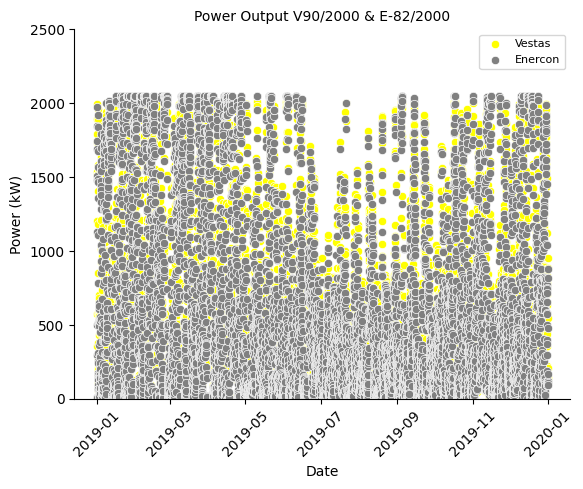

In [ ]:

# plt.plot(x1,linestyle='-', c = 'skyblue', label = 'Vestas')
# plt.plot(x2,linestyle='-', c = 'red', label = 'Enercon')
sns.scatterplot(x1, color='yellow', label = 'Vestas')
sns.scatterplot(x2, color='grey', label = 'Enercon')
# sns.lineplot(x1, c = 'blue', label = 'Vestas')
# sns.lineplot(x2, c = 'red', label = 'Enercon')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Power (kW)', fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
# plt.yticks(fontsize=10)
plt.ylim(0, 2500)
sns.set_style()
sns.despine()
plt.title('Power Output V90/2000 & E-82/2000', fontsize = 10)
#plt.figure(figsize=(4, 6))  # Ukuran gambar 10x6 inci
plt.legend(fontsize=8)
plt.show()

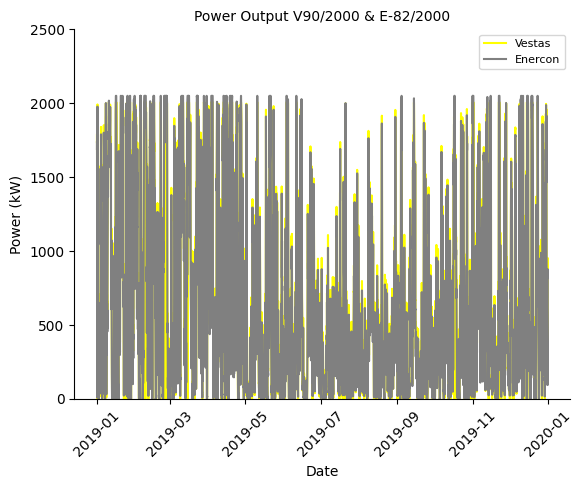

In [162]:
y1 = Power_Output_Vestas
y2 = Power_Output_Enercon

# plt.plot(x1,linestyle='-', c = 'skyblue', label = 'Vestas')
# plt.plot(x2,linestyle='-', c = 'red', label = 'Enercon')
sns.lineplot(y1, color='yellow', label = 'Vestas')
sns.lineplot(y2, color='grey', label = 'Enercon')
# sns.lineplot(x1, c = 'blue', label = 'Vestas')
# sns.lineplot(x2, c = 'red', label = 'Enercon')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Power (kW)', fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
# plt.yticks(fontsize=10)
plt.ylim(0, 2500)
sns.set_style()
sns.despine()
plt.title('Power Output V90/2000 & E-82/2000', fontsize = 10)
#plt.figure(figsize=(4, 6))  # Ukuran gambar 10x6 inci
plt.legend(fontsize=8)
plt.show()